<h3>Police Dataset</h3>
<p>The data from a Police Check Post is given</p>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv(r'C:\Users\Ram Yadav\Downloads\data\Police Data.csv')

In [3]:
data.head()

,stop_date,stop_time,country_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,1/2/2005,1:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,1/18/2005,8:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,1/23/2005,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2/20/2005,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,3/14/2005,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [4]:
data.shape

(65535, 15)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65535 entries, 0 to 65534
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   stop_date           65535 non-null  object 
 1   stop_time           65535 non-null  object 
 2   country_name        0 non-null      float64
 3   driver_gender       61474 non-null  object 
 4   driver_age_raw      61481 non-null  float64
 5   driver_age          61228 non-null  float64
 6   driver_race         61475 non-null  object 
 7   violation_raw       61475 non-null  object 
 8   violation           61475 non-null  object 
 9   search_conducted    65535 non-null  bool   
 10  search_type         2479 non-null   object 
 11  stop_outcome        61475 non-null  object 
 12  is_arrested         61475 non-null  object 
 13  stop_duration       61475 non-null  object 
 14  drugs_related_stop  65535 non-null  bool   
dtypes: bool(2), float64(3), object(10)
memory usage: 6.6+

<h3>Data Visualization</h3>

<h4>1. Driver age Distribution</h4>

Text(0.5, 1.0, 'Distribution of driver age')

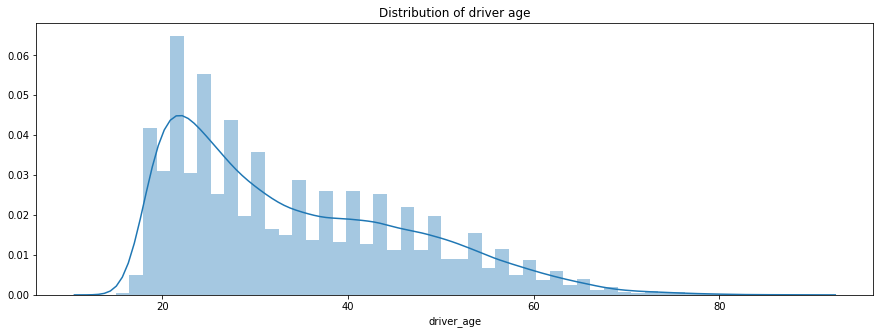

In [6]:
f,ax = plt.subplots(figsize=(15,5))
sns.distplot(data['driver_age'])
plt.title('Distribution of driver age')

<h4>2. Driver Gender Distribution</h4>

([<matplotlib.patches.Wedge at 0x1d4d1f69e08>,
 [Text(-0.739507210510602, 0.8143273823241046, 'Male'),
  Text(0.7462300033334252, -0.8217303585270513, 'Female')],
 [Text(-0.4033675693694192, 0.4441785721767843, '73.5%'),
  Text(0.41009036219224265, -0.4515815483797309, '26.5%')])

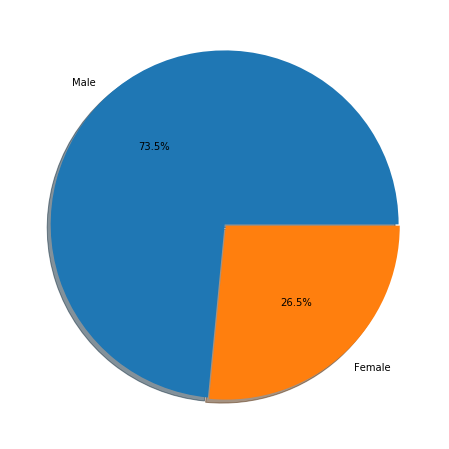

In [7]:
plt.figure(figsize=(15,8))
plt.pie(x=data.driver_gender.value_counts(),explode = (0, 0.01),labels=['Male','Female'],shadow=True,autopct='%1.1f%%')

<h4>3. Stop outcome </h4>

In [8]:
data.stop_outcome.value_counts()

Citation            56564
Arrest Driver        2009
Warning              1889
N/D                   423
No Action             339
Arrest Passenger      251
Name: stop_outcome, dtype: int64

Text(0.5, 1.0, 'Distribution of driver age')

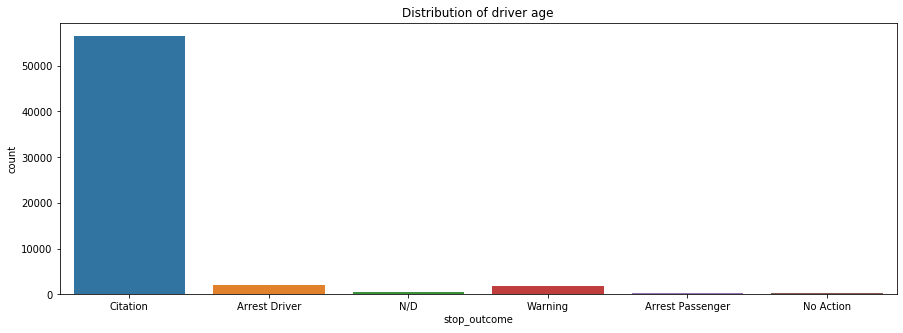

In [9]:
f,ax = plt.subplots(figsize=(15,5))
sns.countplot(data['stop_outcome'])
plt.title('Distribution of driver age')

<h3>Data Cleaning</h3>
<h4>1. Remove the column that only contains missing values</h4>

In [10]:
data.isnull().sum()

stop_date                 0
stop_time                 0
country_name          65535
driver_gender          4061
driver_age_raw         4054
driver_age             4307
driver_race            4060
violation_raw          4060
violation              4060
search_conducted          0
search_type           63056
stop_outcome           4060
is_arrested            4060
stop_duration          4060
drugs_related_stop        0
dtype: int64

In [11]:
data.drop(columns='country_name',inplace=True)

In [12]:
data.head(2)

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,1/2/2005,1:55,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,1/18/2005,8:15,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


<h4>2. For Speeding, were Men or Women stopped more ofter? </h4>

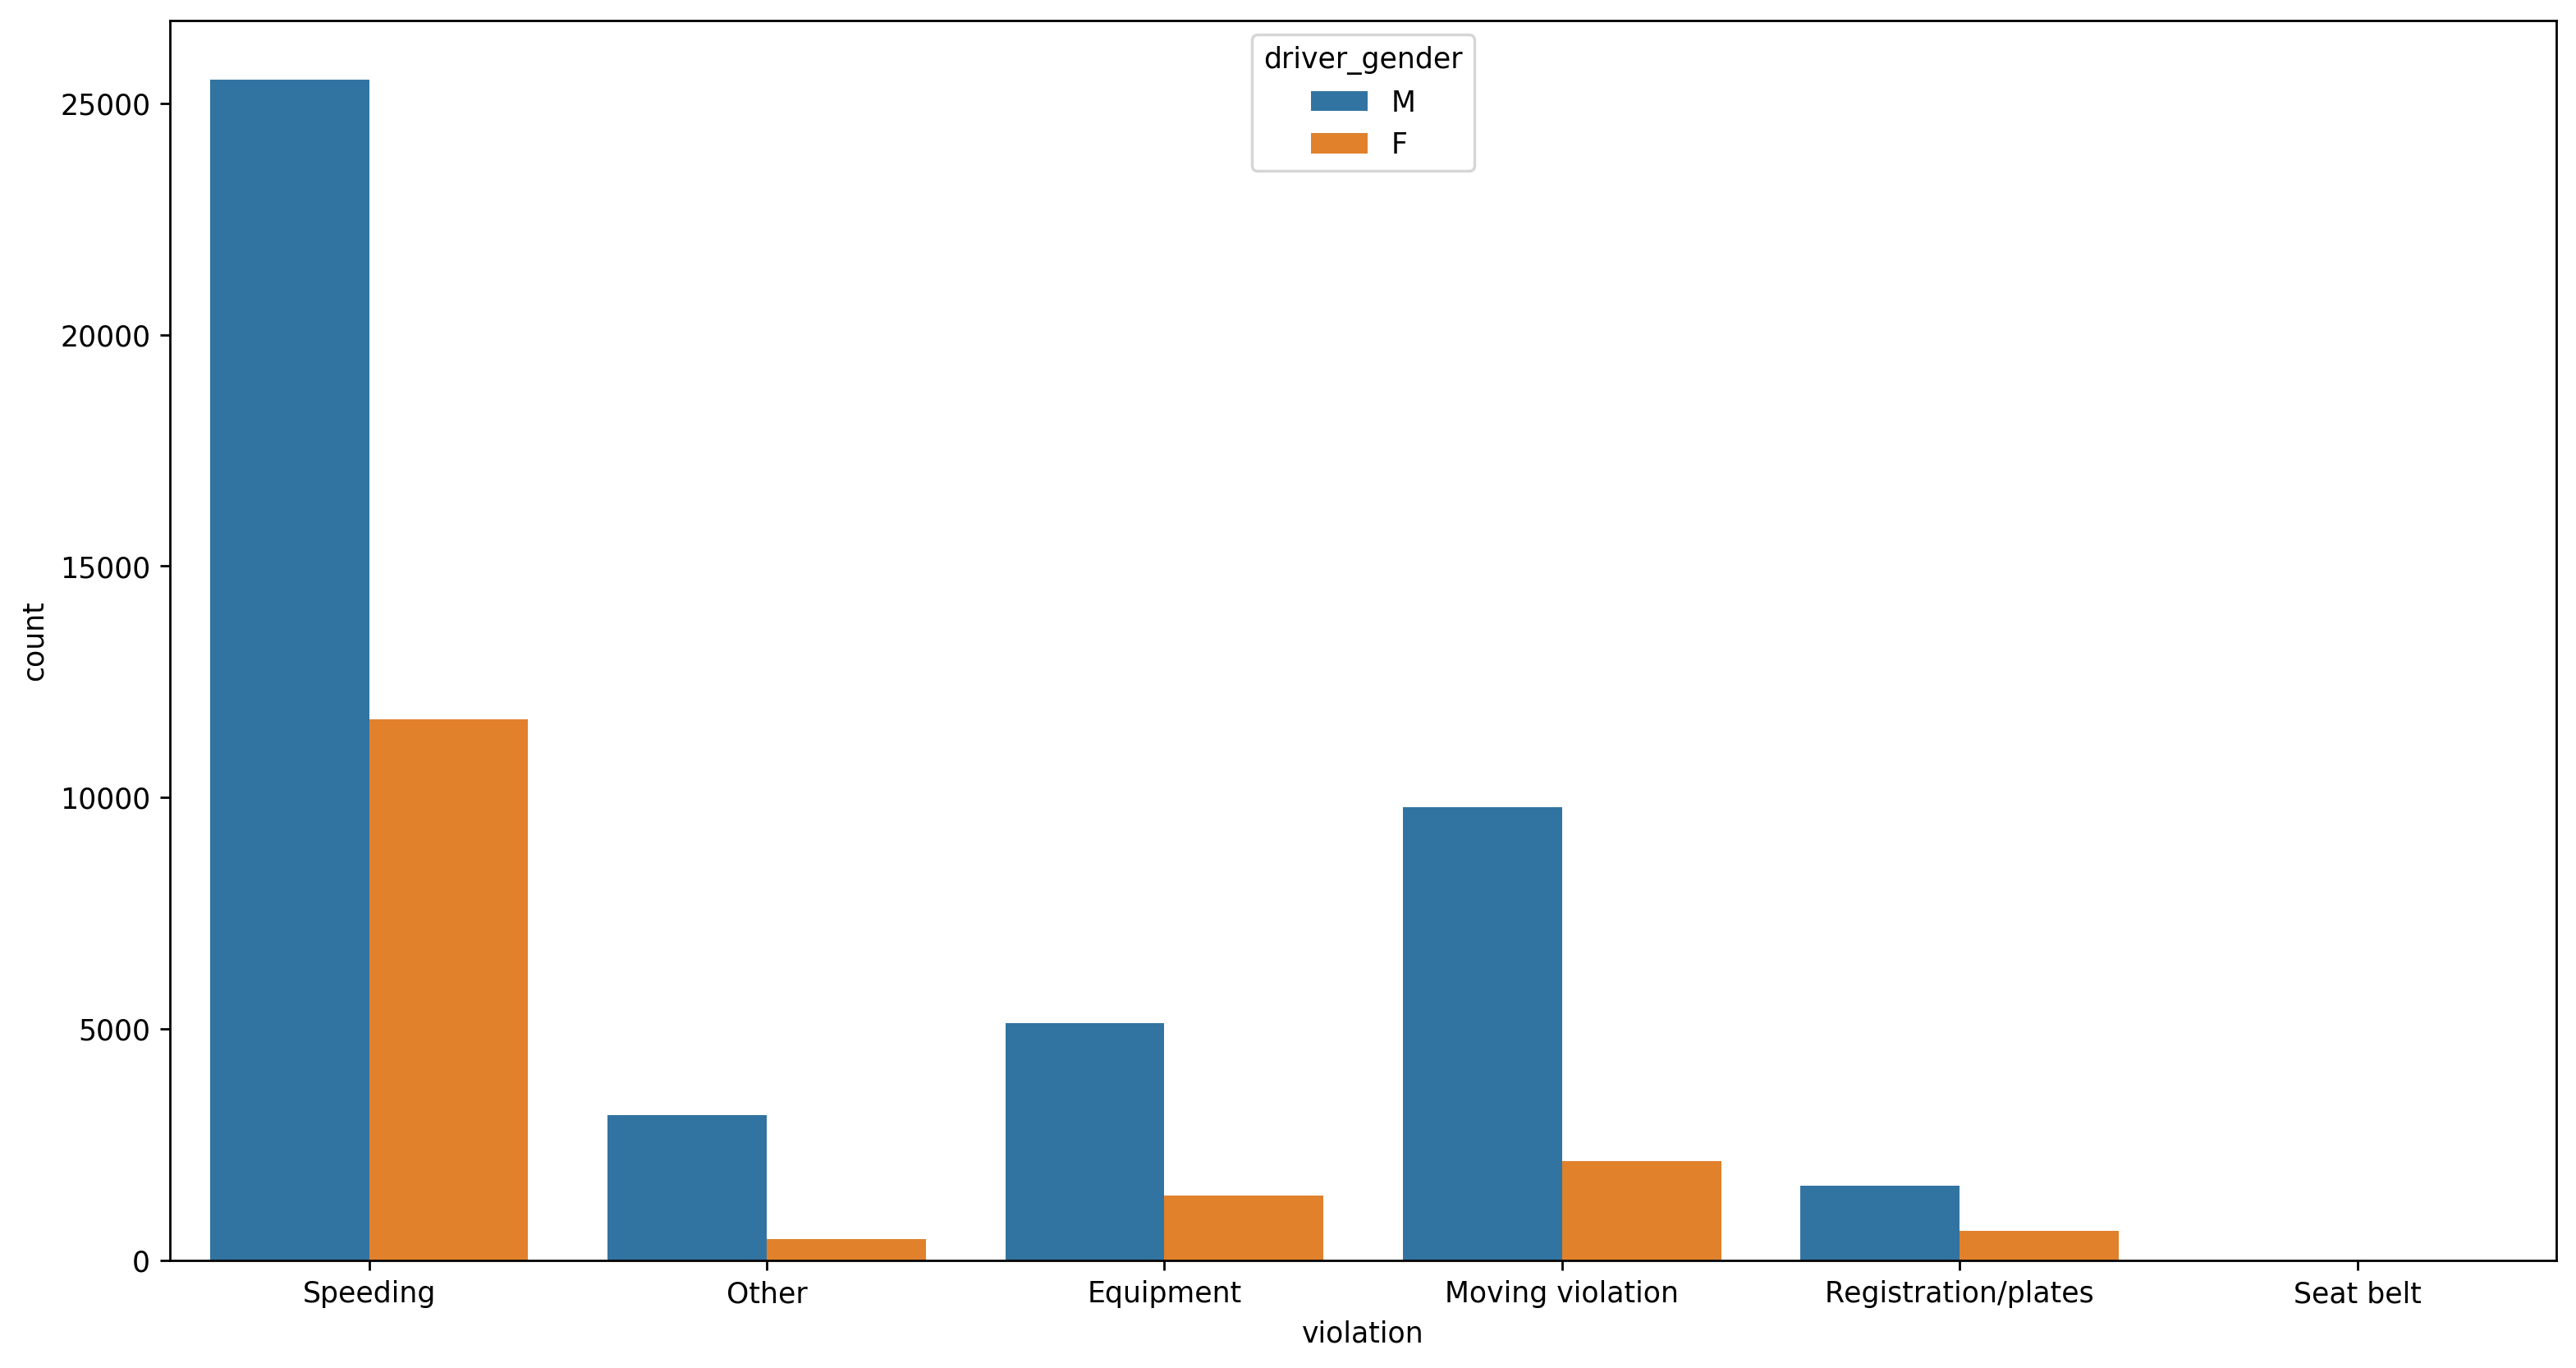

In [13]:
plt.figure(figsize=(15,8),dpi=250)
sns.countplot(x='violation',hue='driver_gender',data=data)

In [14]:
data[data['violation']=='Speeding'].driver_gender.value_counts()

M    25517
F    11686
Name: driver_gender, dtype: int64

<h3>3. Does gender affect who gets searched during a stop?</h3>

In [15]:
data.head(3)

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,1/2/2005,1:55,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,1/18/2005,8:15,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,1/23/2005,23:15,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [16]:
data[data['search_conducted']==True].driver_gender.value_counts()

M    2113
F     366
Name: driver_gender, dtype: int64

In [17]:
data.groupby('driver_gender').search_conducted.sum()

driver_gender
F     366
M    2113
Name: search_conducted, dtype: int64

In [18]:
data.search_conducted.value_counts()

False    63056
True      2479
Name: search_conducted, dtype: int64

Text(0.5, 1.0, 'Compare of search conducted vs driver gender')

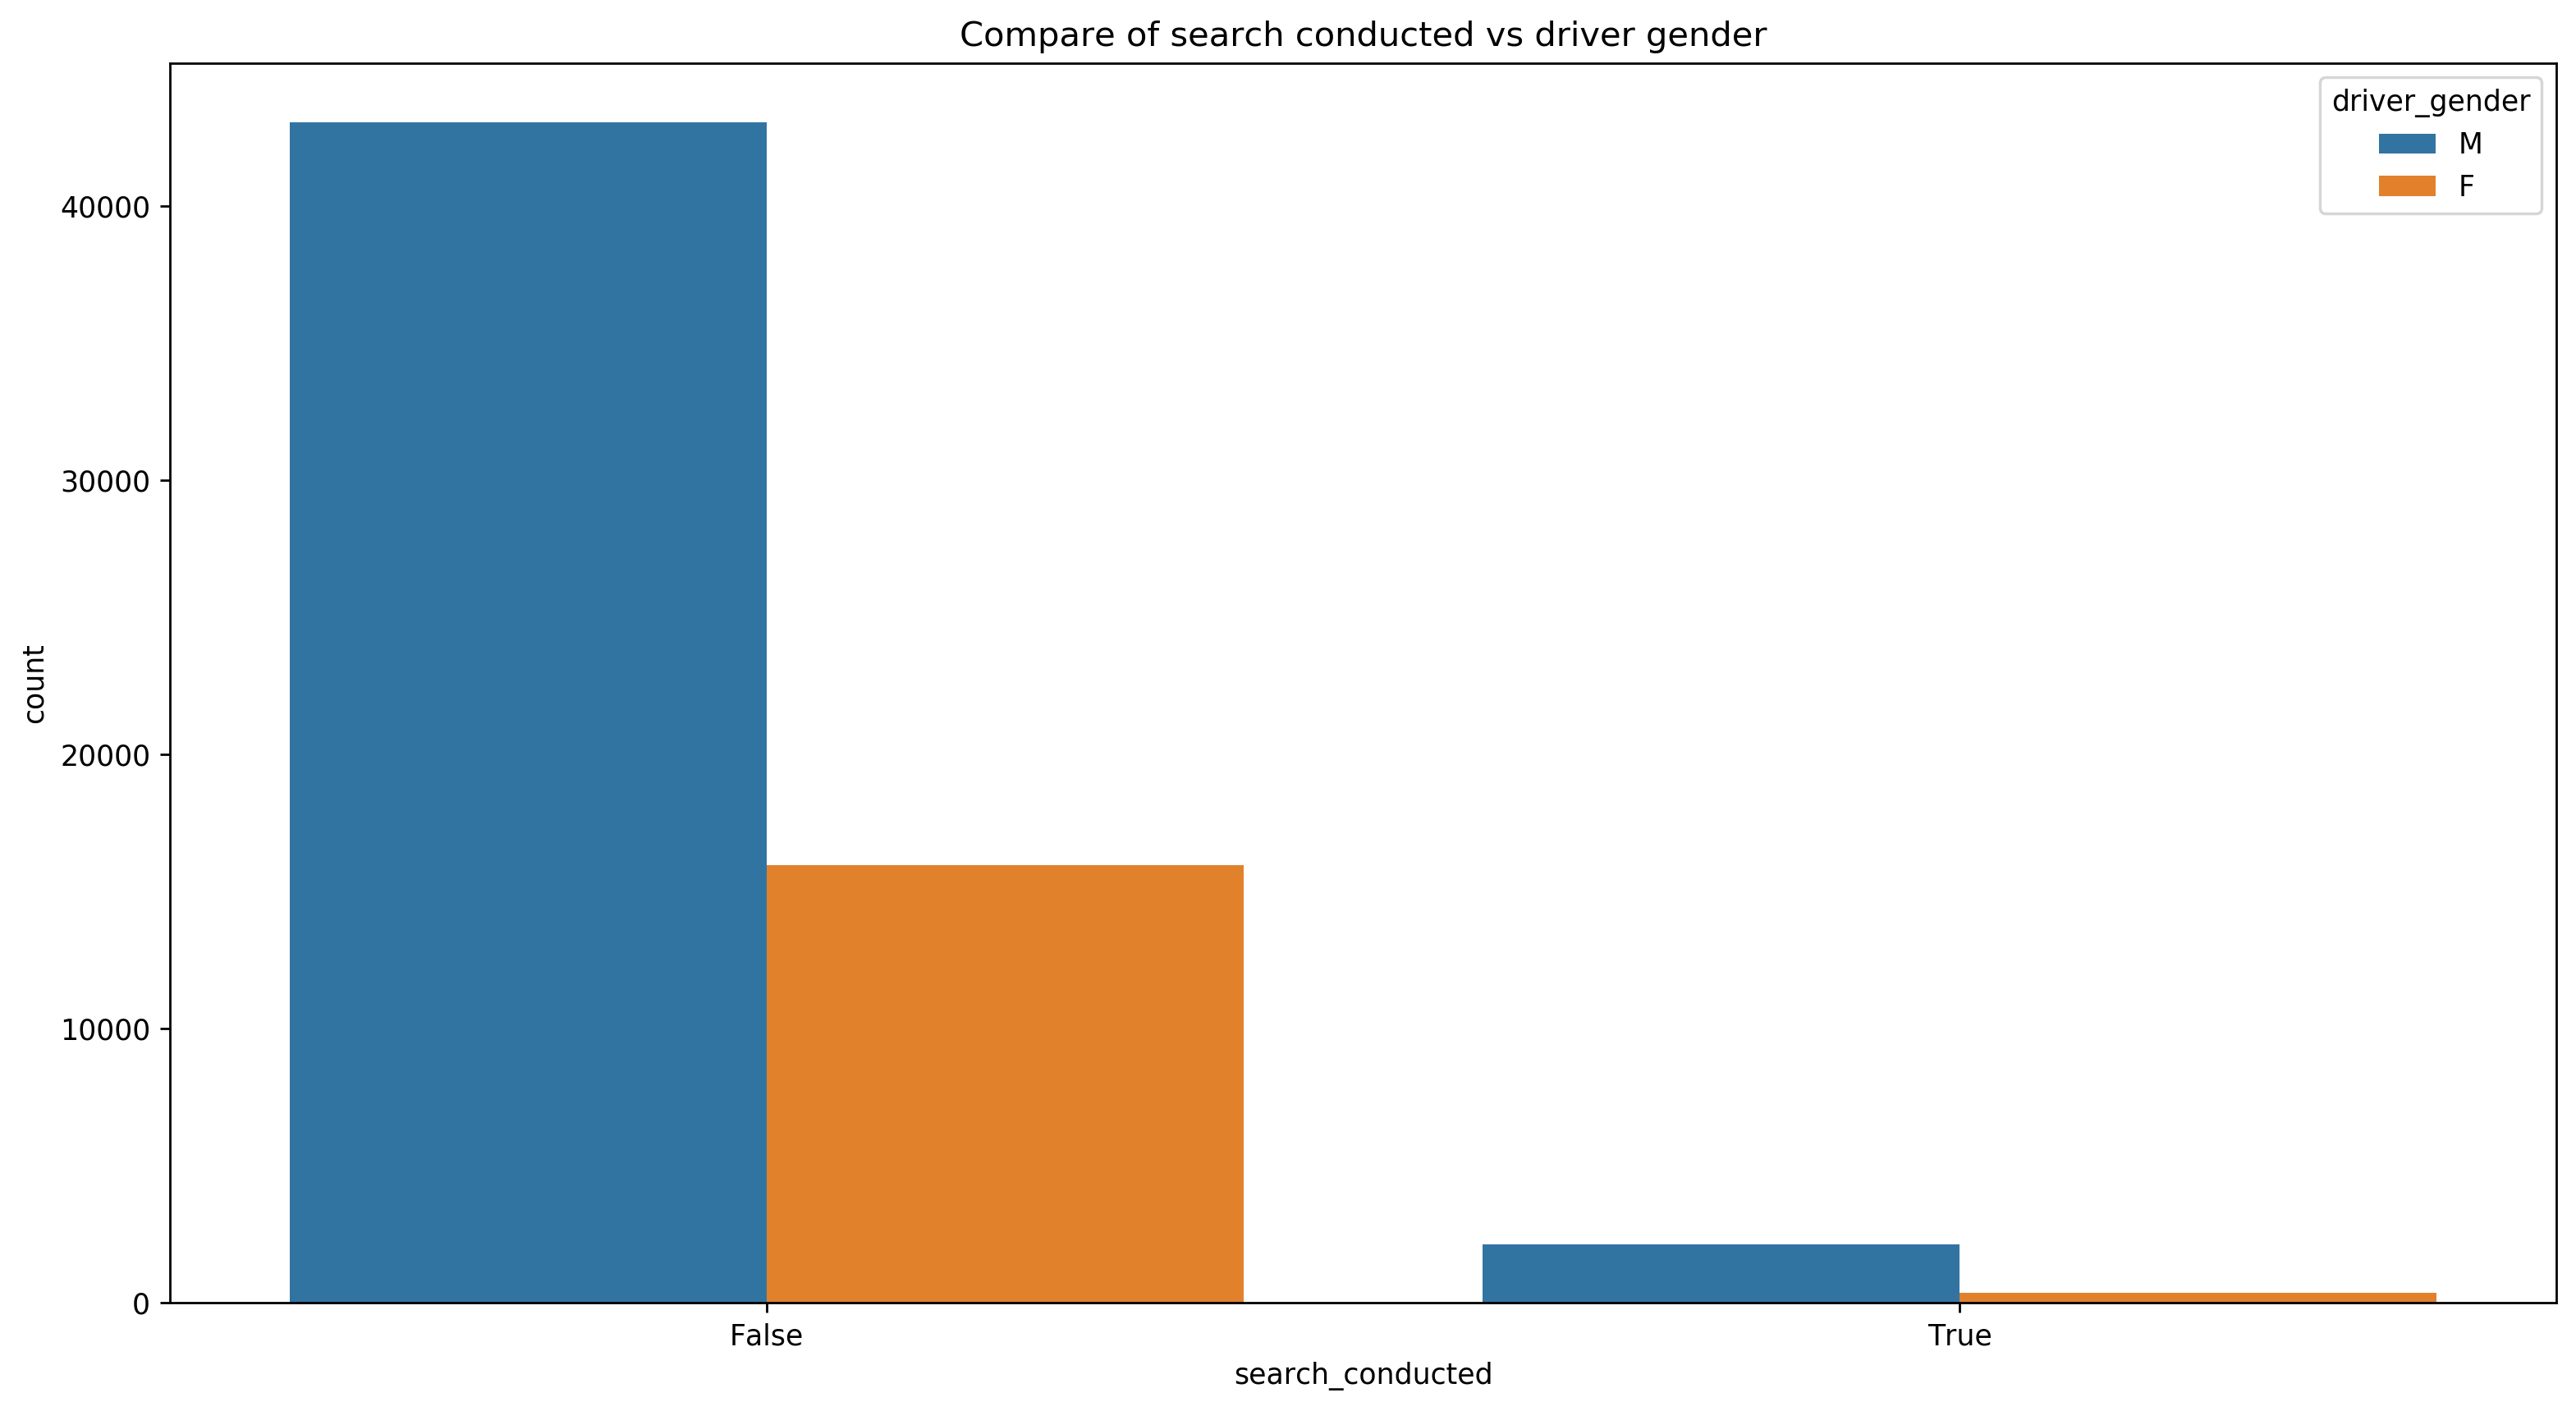

In [19]:
plt.figure(figsize=(15,8),dpi=250)
sns.countplot(x='search_conducted',hue='driver_gender',data=data)
plt.title('Compare of search conducted vs driver gender')

<h4>4. What is the mean stop_duration ?</h4>

In [20]:
data.head(2)

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,1/2/2005,1:55,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,1/18/2005,8:15,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [21]:
data.stop_duration.dtypes

dtype('O')

In [22]:
data.stop_duration.value_counts()

0-15 Min     47379
16-30 Min    11448
30+ Min       2647
2                1
Name: stop_duration, dtype: int64

In [23]:
data['stop_duration'] = data['stop_duration'].map({'0-15 Min' : 7.5,'16-30 Min' : 24,'30+ Min' : 45})

In [24]:
data['stop_duration'].mean()

12.187420698181345

<h4>5. Compare the age distribution for each violation</h4>

In [25]:
data.head(2)

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,1/2/2005,1:55,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,7.5,False
1,1/18/2005,8:15,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,7.5,False


In [26]:
data.groupby('violation').driver_age.describe()

,count,mean,std,min,25%,50%,75%,max
violation,,,,,,,,
Equipment,6507.0,31.682957,11.380671,16.0,23.0,28.0,39.0,81.0
Moving violation,11876.0,36.736443,13.258350,15.0,25.0,35.0,47.0,86.0
Other,3477.0,40.362381,12.754423,16.0,30.0,41.0,50.0,86.0
Registration/plates,2240.0,32.656696,11.150780,16.0,24.0,30.0,40.0,74.0
Seat belt,3.0,30.333333,10.214369,23.0,24.5,26.0,34.0,42.0
Speeding,37120.0,33.262581,12.615781,15.0,23.0,30.0,42.0,88.0


Text(0.5, 1.0, 'Compare of age distribution for each violation')

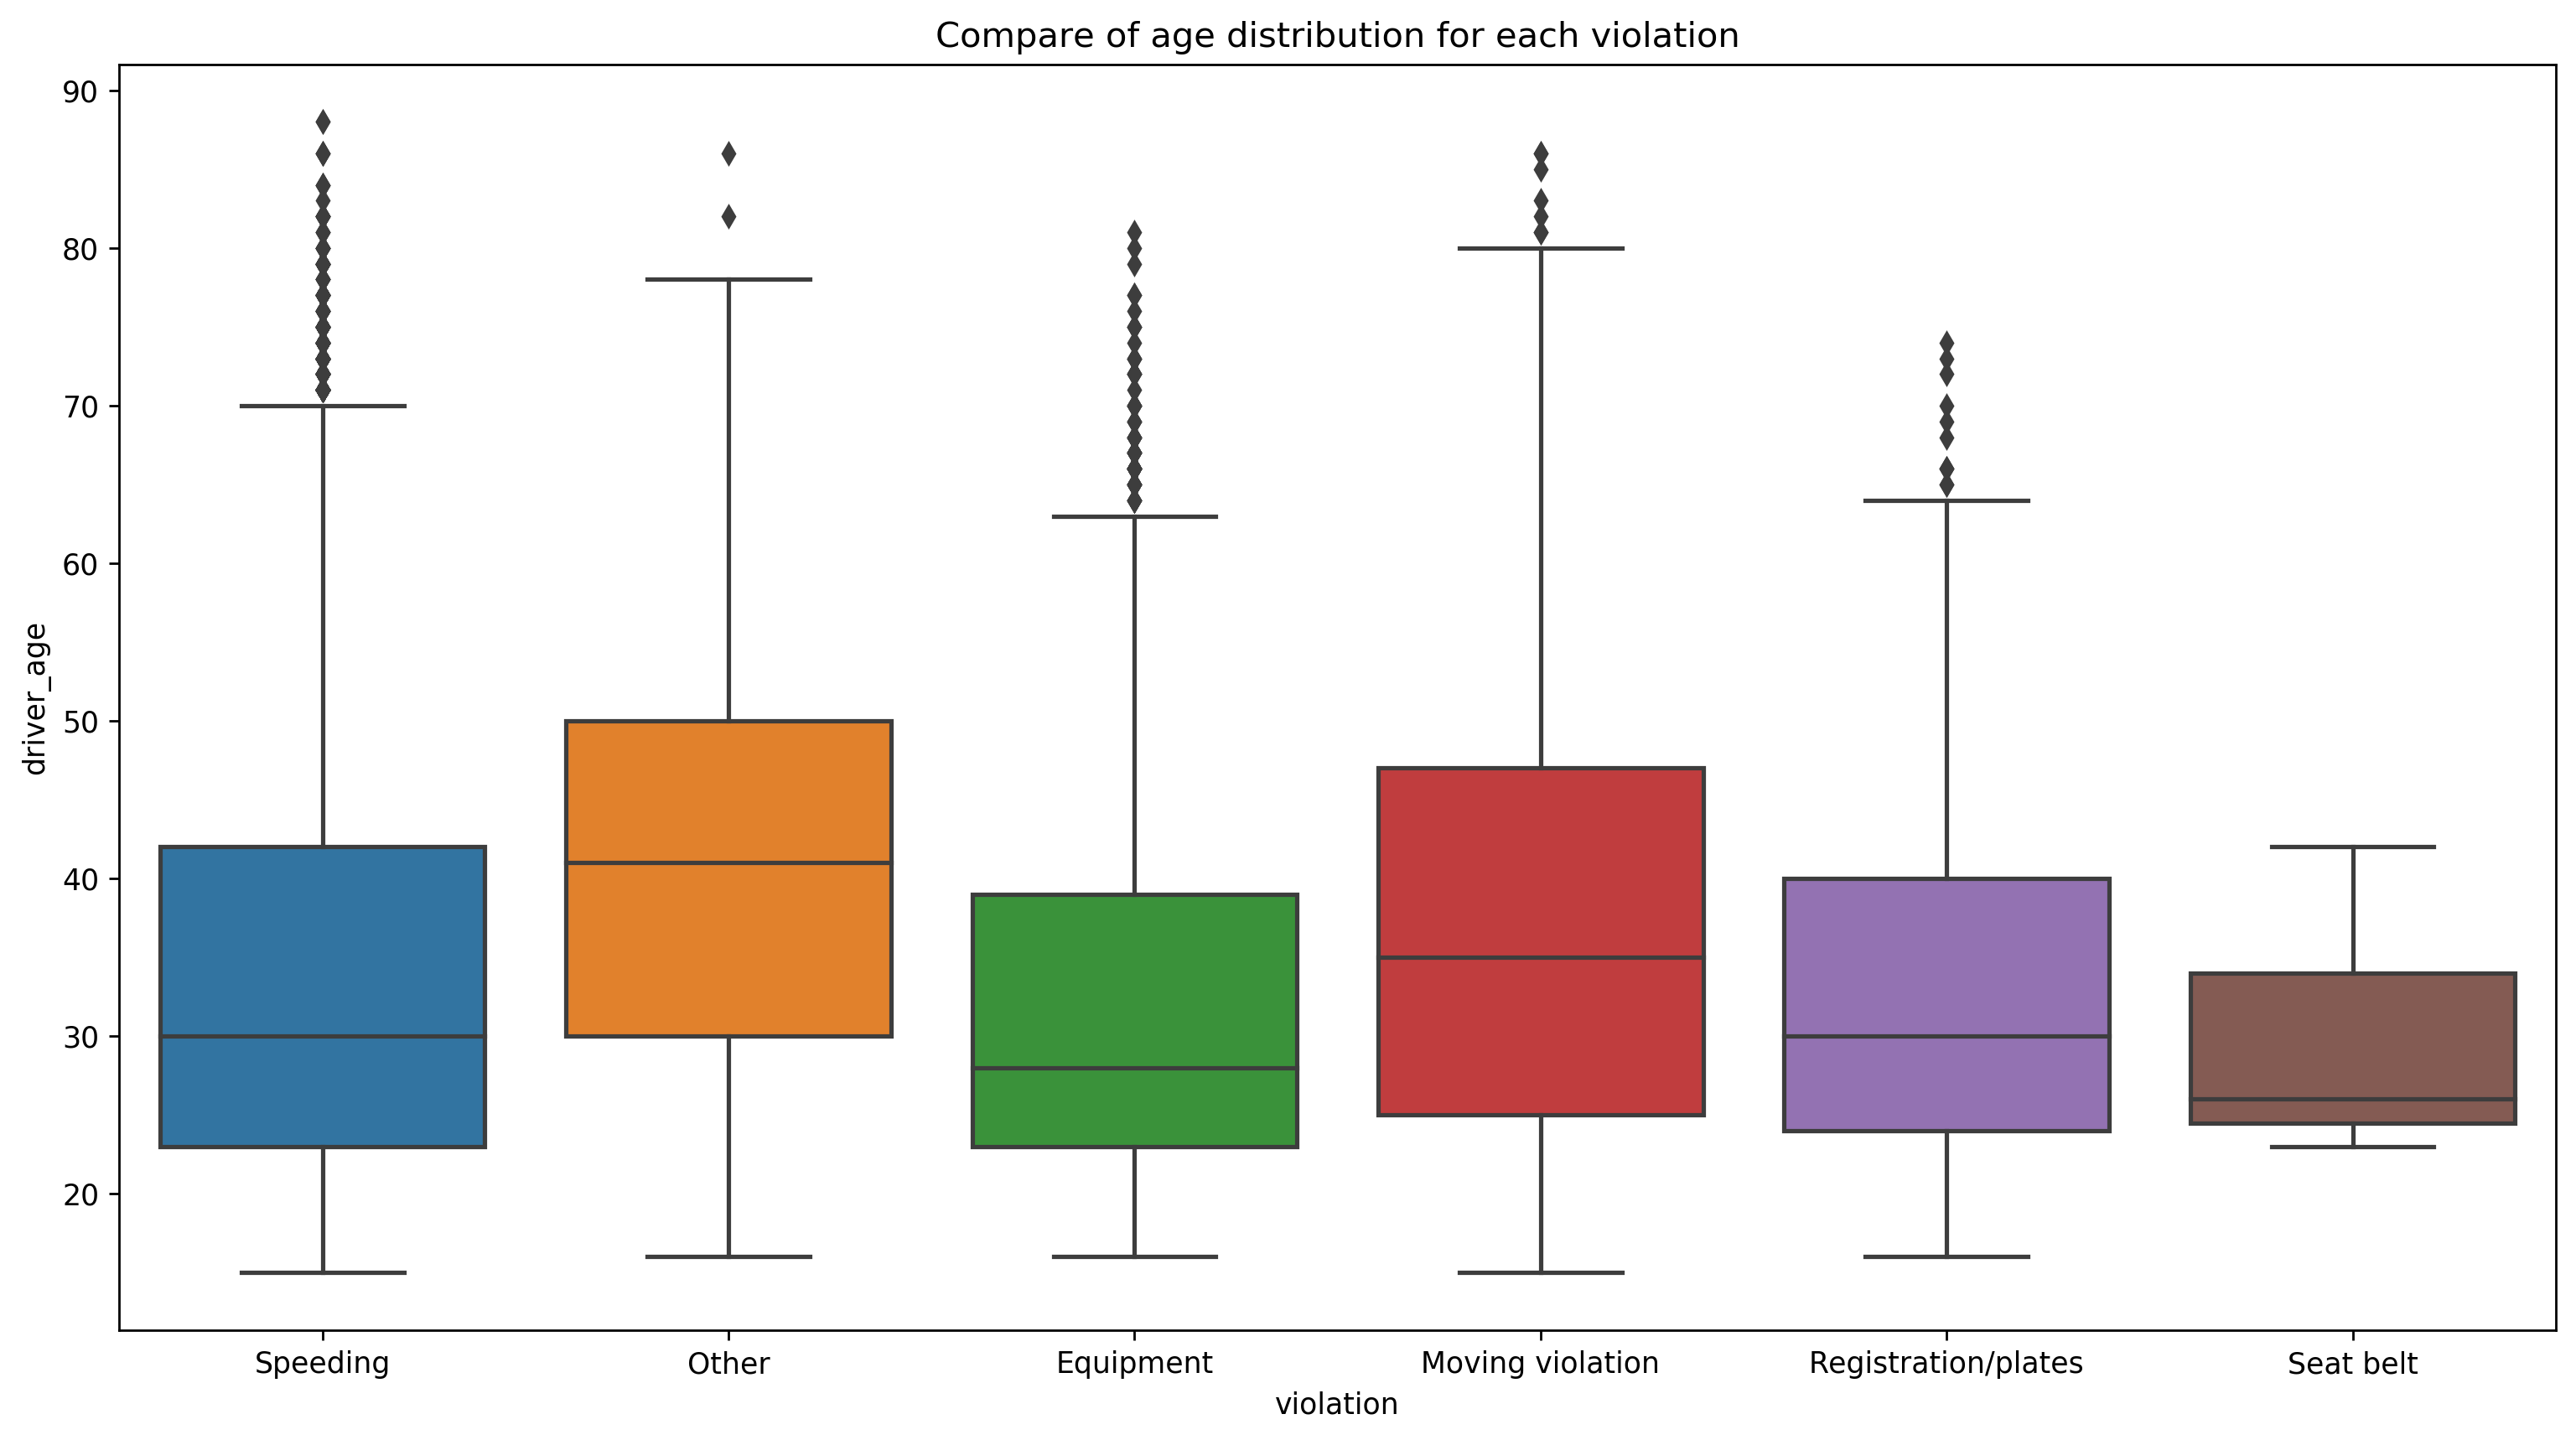

In [27]:
plt.figure(figsize=(15,8),dpi=250)
sns.boxplot(x='violation',y='driver_age',data=data)
plt.title("Compare of age distribution for each violation")

<h4>6. Compare the arrest for each violation</h4>

In [28]:
data.head(2)

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,1/2/2005,1:55,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,7.5,False
1,1/18/2005,8:15,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,7.5,False


In [29]:
data.groupby('violation').is_arrested.value_counts()

violation            is_arrested
Equipment            False           6046
                     True             470
Moving violation     False          11216
                     True             710
Other                False           3327
                     True             256
Registration/plates  False           1967
                     True             276
Seat belt            False              3
Speeding             False          36656
                     True             548
Name: is_arrested, dtype: int64

Text(0.5, 1.0, 'Compare of violation vs arrest')

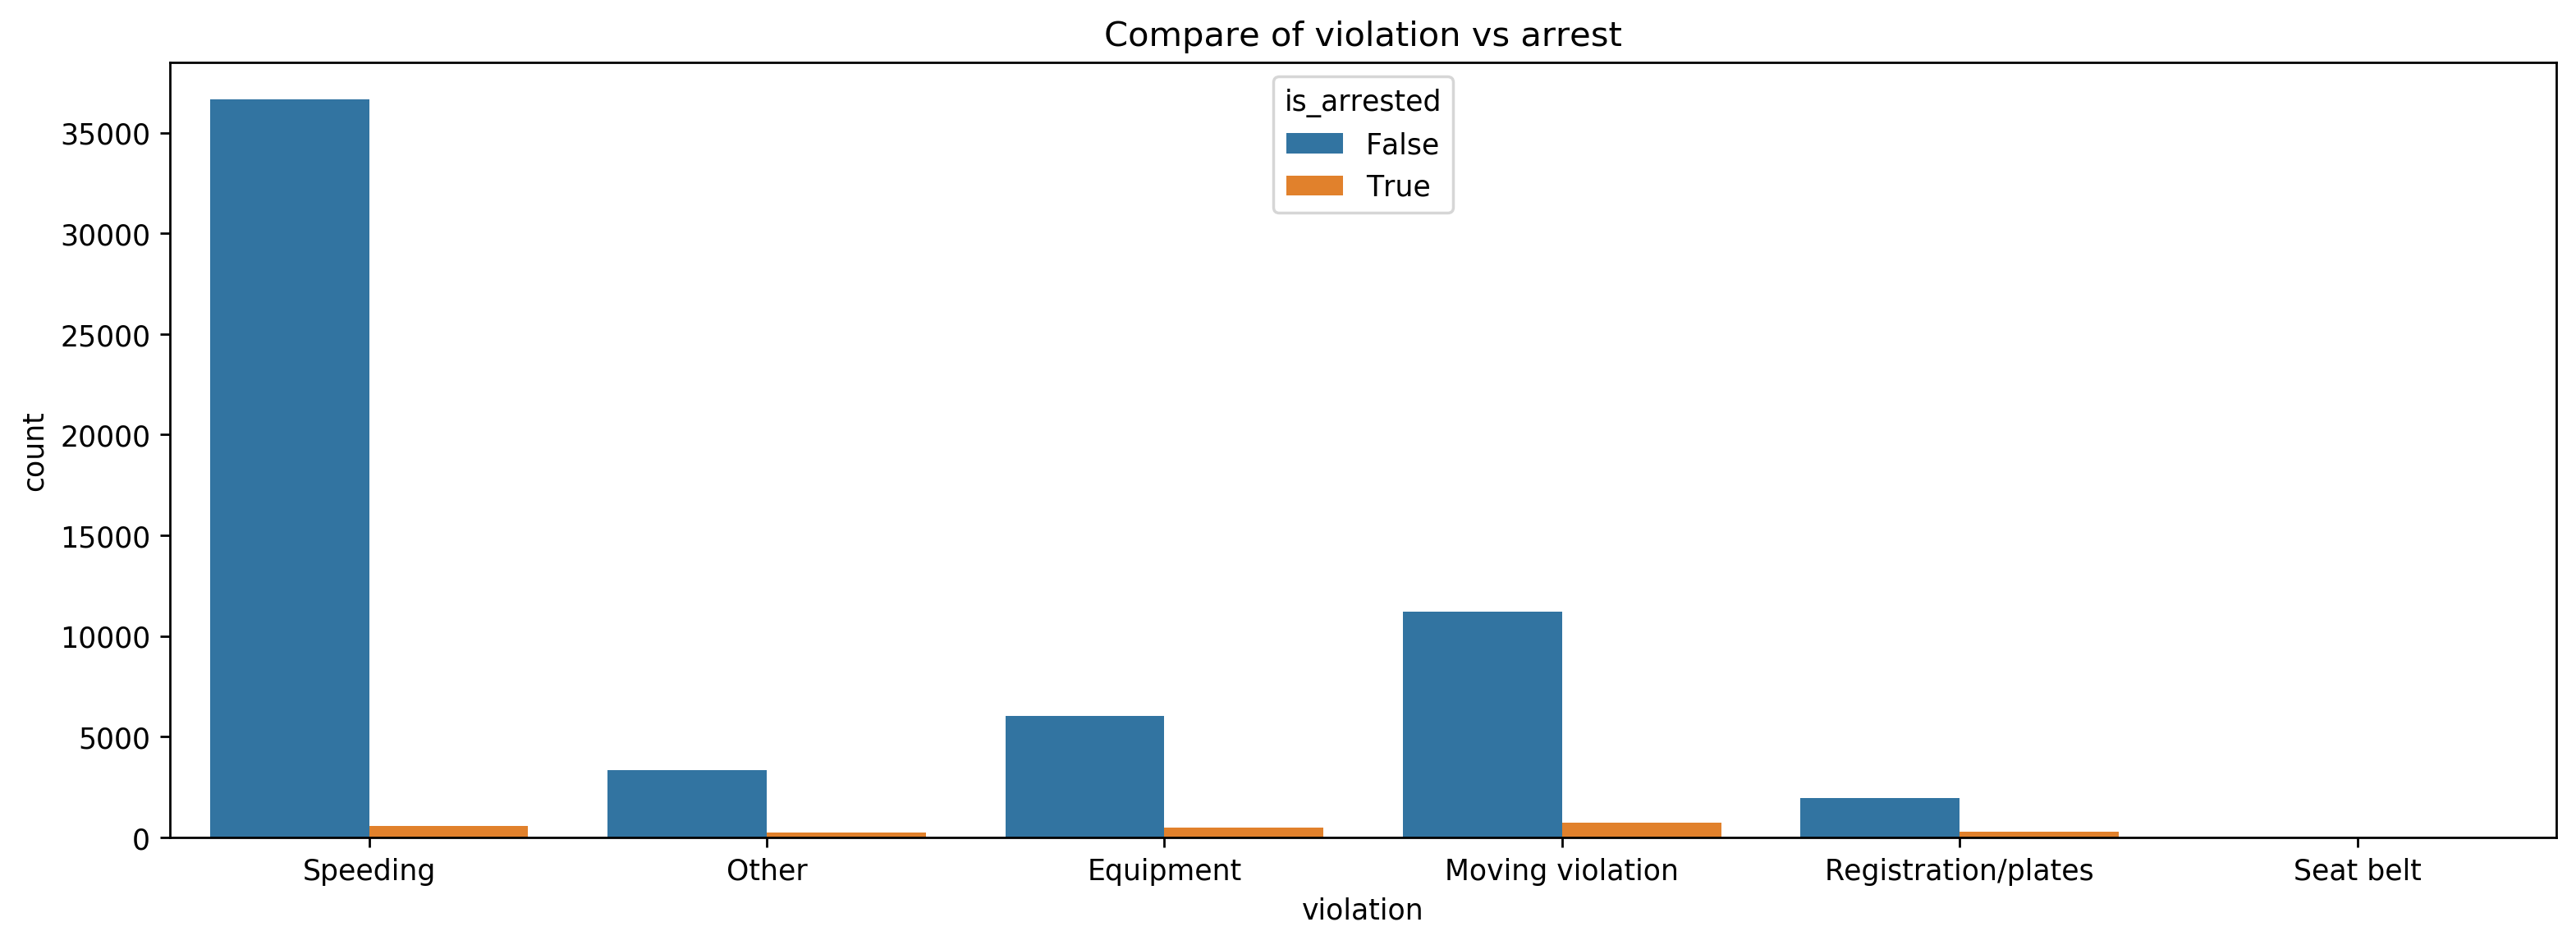

In [30]:
plt.figure(figsize=(15,5),dpi=250)
sns.countplot(x='violation',hue='is_arrested',data=data)
plt.title('Compare of violation vs arrest')

<h4>7. For Drugs related stop, were Men or Women stopped more ofter? </h4>

In [31]:
data.head(2)

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,1/2/2005,1:55,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,7.5,False
1,1/18/2005,8:15,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,7.5,False


In [32]:
data.groupby('drugs_related_stop').driver_gender.value_counts()

drugs_related_stop  driver_gender
False               M                44702
                    F                16254
True                M                  462
                    F                   56
Name: driver_gender, dtype: int64

<h4>8. Compare the driver race for each violation</h4>

In [33]:
data.groupby('violation').driver_race.value_counts()

violation            driver_race
Equipment            White           4040
                     Black           1262
                     Hispanic        1069
                     Asian            130
                     Other             15
Moving violation     White           8016
                     Black           2076
                     Hispanic        1543
                     Asian            242
                     Other             49
Other                White           2261
                     Black            767
                     Hispanic         469
                     Asian             65
                     Other             21
Registration/plates  White           1243
                     Black            503
                     Hispanic         467
                     Asian             29
                     Other              1
Seat belt            Black              1
                     Hispanic           1
                     White              1
S

Text(0.5, 1.0, 'Compare of violation vs driver race')

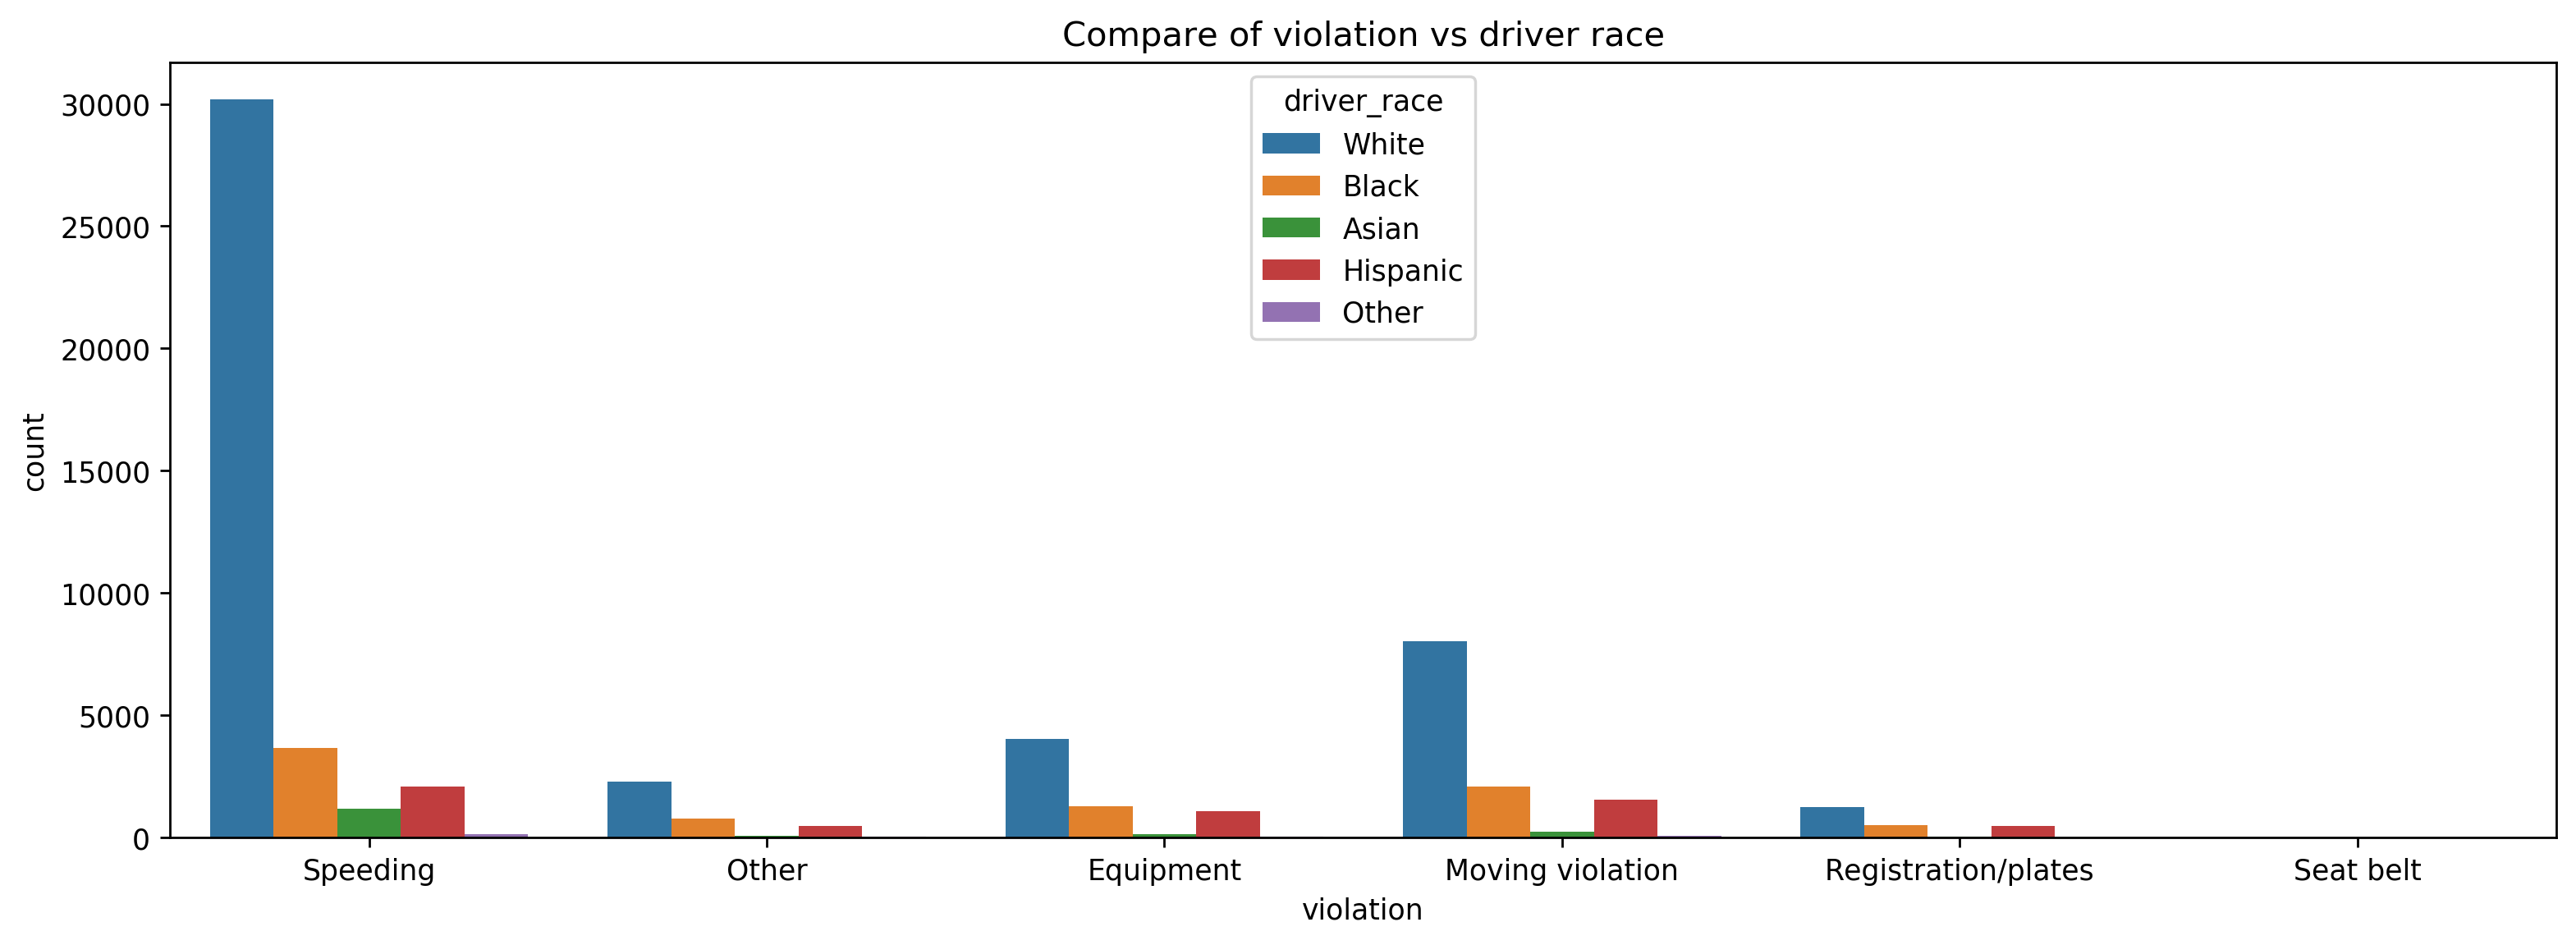

In [34]:
plt.figure(figsize=(15,5),dpi=250)
sns.countplot(x='violation',hue='driver_race',data=data)
plt.title('Compare of violation vs driver race')

<h4>9. Compare the Stop outcome for each violation</h4>

In [35]:
data.head(2)

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,1/2/2005,1:55,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,7.5,False
1,1/18/2005,8:15,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,7.5,False


In [36]:
data.groupby('stop_outcome').violation.value_counts()

stop_outcome      violation          
Arrest Driver     Moving violation         643
                  Speeding                 504
                  Equipment                362
                  Registration/plates      252
                  Other                    248
Arrest Passenger  Equipment                108
                  Moving violation          67
                  Speeding                  44
                  Registration/plates       24
                  Other                      8
Citation          Speeding               35870
                  Moving violation       10644
                  Equipment               5088
                  Other                   3071
                  Registration/plates     1888
                  Seat belt                  3
N/D               Equipment                327
                  Speeding                  43
                  Moving violation          29
                  Registration/plates       15
                  Othe

Text(0.5, 1.0, 'Compare of violation vs stop outcome')

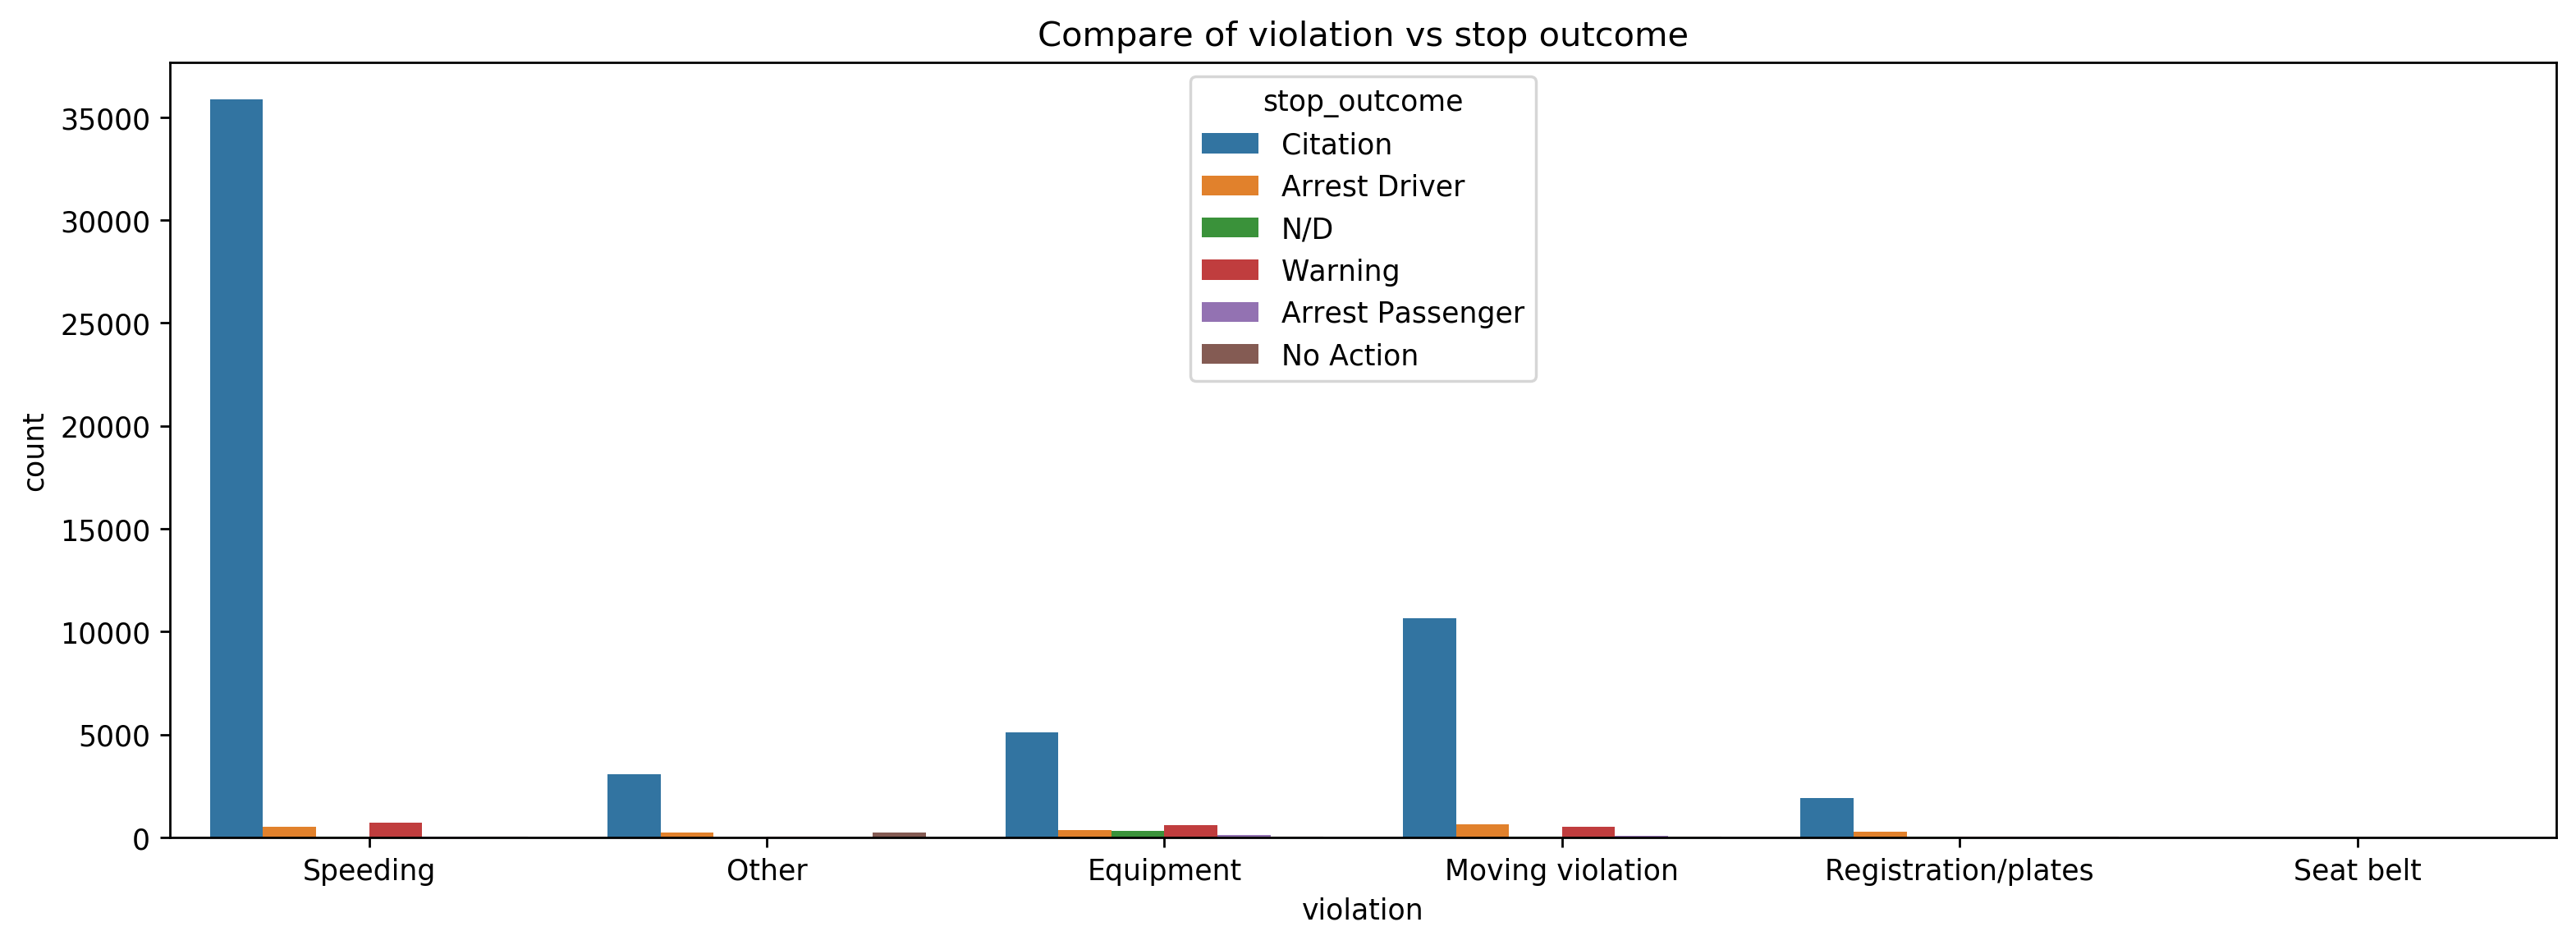

In [37]:
plt.figure(figsize=(15,5),dpi=250)
sns.countplot(x='violation',hue='stop_outcome',data=data)
plt.title('Compare of violation vs stop outcome')